# **EVALUACION 1 MINERIA DE DATOS 2024 (BIY7121_004V) - STARCRAFT II**

In [63]:
# Importamos librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer

## **1. BUSSINESS UNDERSTANDING**

### 1.1. **Contexto** 


Se nos ha entregado un dataset correspondiente a información de partidas multijugador de Starcraft II, juego RTS (Real Time Strategy) lanzado en 2010 como una secuela del juego lanzado originalmente en 1998. El dataset contiene información de diferentes partidas con infromación relevante de cada uno de estos, tales como la edad de jugadores, horas jugadas, acciones por minutos, etc. 

### 1.2. **Definición de columnas**


* **GameID** *(entero)*: Número de identificación único para cada partido (entero)
* **LeagueIndex** *(ordinal)*: Ligas de Bronce, Plata, Oro, Platino, Diamante, Maestro, Gran Maestro y Profesional codificadas del 1 al 8.
* **Age** *(entero)*: Edad de cada jugador.
* **HoursPerWeek** *(entero)*: Horas de juego semanales declaradas.
* **TotalHours** *(entero)*: Total de horas de juego declaradas.
* **APM** *(continuo)*: Acciones por minuto.
* **SelectByHotkeys** *(continuo)*: Número de selecciones de unidades o edificios realizadas mediante teclas de acceso rápido por marca de tiempo.
* **AssignToHotkeys** *(continuo)*: Número de unidades o edificios asignados a teclas de acceso rápido por marca de tiempo 
* **UniqueHotkeys** *(continuo)*: Número de teclas de acceso rápido utilizadas por marca de tiempo.
* **MinimapAttacks** *(continuo)*: Número de acciones de ataque en el minimapa por marca de tiempo.
* **MinimapRightClicks** *(continuo)*: número de clics con el botón derecho en el minimapa por marca de tiempo.
* **NumberOfPACs** *(continuo)*: Número de PACs por marca de tiempo.
* **GapBetweenPACs** *(continuo)*: Duración media en milisegundos entre PACs.
* **ActionLatency** *(continuo)*: Latencia media desde el inicio de un PAC hasta su primera acción en milisegundos.
* **ActionsInPAC** *(continuo)*: Número medio de acciones dentro de cada PAC.
* **TotalMapExplored** *(continuo)*: El número de cuadrículas de coordenadas de juego de 24x24 vistas por el jugador por marca de tiempo.
* **WorkersMade** *(continuo)*: Número de SCV, drones y sondas entrenados por marca de tiempo.
* **UniqueUnitsMade** *(continuo)*: Unidades únicas fabricadas por marca de tiempo.
* **ComplexUnitsMade** *(continuo)*: Número de fantasmas, infestadores y altos templarios entrenados por marca de tiempo.
* **ComplexAbilitiesUsed** *(continuo)*: Habilidades que requieren instrucciones de puntería específicas utilizadas por marca de tiempo.

In [64]:
# Cargamos el dataset
sc2DF = pd.read_csv("starcraft_duoc.csv", delimiter=';')

## **2. DATA UNDERSTANDING**

In [65]:
# Numero total de filas y columnas, respectivamente
sc2DF.shape

(3395, 20)

In [66]:
# Mostramos los primeros 5 registros
sc2DF.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
0,52,5,27.0,10.0,3000.0,143.718,0.003515159,0.000219697,0.000109849,0.000392317,0.004849,326.677,408.673,47.508,0.000220,0.0013966,4.71e-05,0,0,127448
1,55,5,23.0,10.0,5000.0,1.292.322,0.003303812,0.000259462,0.000294057,0.000432436,0.004307,329.194,423.454,48.434,0.000381,0.0011935,8.65e-05,0,0.00020757,57812
2,56,4,30.0,10.0,200.0,699.612,0.001101091,0.00033557,0.000293624,0.000461409,0.002926,446.475,753.548,4.043,0.000231,0.00074455,6.29e-05,0,0.00018876,95360
3,57,3,19.0,20.0,400.0,1.076.016,0.001033542,0.000213101,5.33e-05,0.000543409,0.003783,292.203,537.352,49.155,0.000202,0.0004262,7.46e-05,0,0.00038358,93852
4,58,3,32.0,10.0,500.0,1.228.908,0.001136014,0.000327326,0,0.001328558,0.002368,226.885,620.813,9.374,0.000289,0.0011745,7.7e-05,0,1.93e-05,51936


In [68]:
# Los ultimos 5 registros
sc2DF.tail()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
3390,10089,8,NaN,NaN,NaN,2.596.296,0.020425314,0.00074296,0.000621163,0.000146156,0.004555,186.059,428.342,62.754,0.000560,0.00087694,6.09e-05,0,0,82104
3391,10090,8,NaN,NaN,NaN,314.67,0.028043136,0.001157179,0.000246208,0.001083317,0.004259,143.023,361.156,71.965,0.000394,0.00078787,9.85e-05,0,0,40616
3392,10092,8,NaN,NaN,NaN,2.994.282,0.028341014,0.000860215,0.000337942,0.000168971,0.004439,124.028,395.156,63.979,0.000292,0.0012596,6.14e-05,0,0,65100
3393,10094,8,NaN,NaN,NaN,3.758.664,0.036435894,0.000594265,0.000204279,0.000779973,0.004346,11.691,348.547,79.615,0.000279,0.00061284,0.000111425,0,0.00063141,53848
3394,10095,8,NaN,NaN,NaN,3.483.576,0.029854921,0.000811174,0.000223772,0.001314661,0.005566,200.537,335.142,63.719,0.000252,0.0015664,6.53e-05,0.000456868,0.00089509,107252


In [79]:
# Resumen estadístico de nuestras columnas
sc2DF.describe()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
count,3395.000000,3395.000000,3340.000000,3339.000000,3338.000000,3.395000e+03,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3.395000e+03,3.395000e+03,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4805.012371,4.184094,21.647904,15.910752,960.421809,9.614977e+05,0.004299,0.000374,0.000098,0.000387,0.003463,3.575657e+05,5.642948e+05,47.216492,0.000283,0.001032,0.000085,0.000059,0.000142,83598.229161
std,2719.944851,1.517327,4.206341,11.962912,17318.133922,6.483619e+05,0.005284,0.000225,0.000166,0.000377,0.000992,2.020757e+05,2.634136e+05,20.604812,0.000087,0.000519,0.000025,0.000111,0.000265,33497.667966
min,52.000000,1.000000,16.000000,0.000000,3.000000,3.504000e+01,0.000000,0.000000,0.000000,0.000000,0.000679,1.600000e+01,3.403000e+01,2.454000,0.000091,0.000077,0.000020,0.000000,0.000000,25224.000000
25%,2464.500000,3.000000,19.000000,8.000000,300.000000,5.236230e+05,0.001258,0.000204,0.000000,0.000140,0.002754,2.495860e+05,4.513540e+05,38.993500,0.000224,0.000683,0.000068,0.000000,0.000000,60090.000000
50%,4874.000000,4.000000,21.000000,12.000000,500.000000,9.416580e+05,0.002500,0.000353,0.000040,0.000281,0.003395,3.452850e+05,5.750880e+05,48.797000,0.000270,0.000905,0.000082,0.000000,0.000020,81012.000000
75%,7108.500000,5.000000,24.000000,20.000000,800.000000,1.321518e+06,0.005133,0.000499,0.000119,0.000514,0.004027,4.639940e+05,7.110485e+05,58.717500,0.000325,0.001259,0.000099,0.000086,0.000181,102074.000000
max,10095.000000,8.000000,44.000000,168.000000,1000000.000000,5.641026e+06,0.043088,0.001752,0.003019,0.004041,0.007971,2.371429e+06,1.763721e+06,185.581000,0.000832,0.005149,0.000202,0.000902,0.003084,388032.000000


In [70]:
# Una vista a los tipos de datos de cada una de las columnas
sc2DF.dtypes

GameID                  int64
LeagueIndex             int64
Age                   float64
HoursPerWeek          float64
TotalHours            float64
APM                    object
SelectByHotkeys        object
AssignToHotkeys        object
MinimapAttacks         object
MinimapRightClicks     object
NumberOfPACs          float64
GapBetweenPACs         object
ActionLatency          object
ActionsInPAC          float64
TotalMapExplored      float64
WorkersMade            object
UniqueUnitsMade        object
ComplexUnitsMade       object
ComplexAbilityUsed     object
MaxTimeStamp            int64
dtype: object

De esta revisión es posible observar lo siguiente:
* Se da cuenta de que no existen variables categóricas en nuestro data set, por lo que no es necesario hacer un proceso de encoding de dichas variables.
* Sin embargo, podemos observar que muchas columnas de nuestro dataset presentan problemas de formato. Dicho de otro modo, es posible notar que hay números, sean enteros (int) o decimales (float), que están bajo formato de texto (string). Se hace necesario, por tanto, hacer un tratamiento para darles el formato correcto.

In [71]:
# Con este loop vamos a eliminar los puntos que nos impidan transformar los strings en variables floats
# Asimismo, convertiremos las comas de los números decimales en puntos para poder convertirlos en variables floats 
for column in sc2DF.columns:
    for row in range(len(sc2DF)):
        try:
            if isinstance(sc2DF[column][row], str):
                if sc2DF[column][row][-4] == '.':
                    sc2DF.loc[row, column] = sc2DF[column][row].replace('.', '')
                if sc2DF[column][row][1] == ',':
                    sc2DF.loc[row, column] = sc2DF[column][row].replace(',', '.')
        except:
            pass

In [72]:
sc2DF = sc2DF.astype(float)

In [73]:
sc2DF.dtypes

GameID                float64
LeagueIndex           float64
Age                   float64
HoursPerWeek          float64
TotalHours            float64
APM                   float64
SelectByHotkeys       float64
AssignToHotkeys       float64
MinimapAttacks        float64
MinimapRightClicks    float64
NumberOfPACs          float64
GapBetweenPACs        float64
ActionLatency         float64
ActionsInPAC          float64
TotalMapExplored      float64
WorkersMade           float64
UniqueUnitsMade       float64
ComplexUnitsMade      float64
ComplexAbilityUsed    float64
MaxTimeStamp          float64
dtype: object

In [74]:
sc2DF.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
0,52.0,5.0,27.0,10.0,3000.0,143718.0,0.003515,0.000220,0.000110,0.000392,0.004849,326677.0,408673.0,47.508,0.000220,0.001397,0.000047,0.0,0.000000,127448.0
1,55.0,5.0,23.0,10.0,5000.0,1292322.0,0.003304,0.000259,0.000294,0.000432,0.004307,329194.0,423454.0,48.434,0.000381,0.001193,0.000087,0.0,0.000208,57812.0
2,56.0,4.0,30.0,10.0,200.0,699612.0,0.001101,0.000336,0.000294,0.000461,0.002926,446475.0,753548.0,4.043,0.000231,0.000745,0.000063,0.0,0.000189,95360.0
3,57.0,3.0,19.0,20.0,400.0,1076016.0,0.001034,0.000213,0.000053,0.000543,0.003783,292203.0,537352.0,49.155,0.000202,0.000426,0.000075,0.0,0.000384,93852.0
4,58.0,3.0,32.0,10.0,500.0,1228908.0,0.001136,0.000327,0.000000,0.001329,0.002368,226885.0,620813.0,9.374,0.000289,0.001174,0.000077,0.0,0.000019,51936.0


In [75]:
sc2DF.tail()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
3390,10089.0,8.0,NaN,NaN,NaN,2596296.00,0.020425,0.000743,0.000621,0.000146,0.004555,186059.0,428342.0,62.754,0.000560,0.000877,0.000061,0.000000,0.000000,82104.0
3391,10090.0,8.0,NaN,NaN,NaN,314.67,0.028043,0.001157,0.000246,0.001083,0.004259,143023.0,361156.0,71.965,0.000394,0.000788,0.000098,0.000000,0.000000,40616.0
3392,10092.0,8.0,NaN,NaN,NaN,2994282.00,0.028341,0.000860,0.000338,0.000169,0.004439,124028.0,395156.0,63.979,0.000292,0.001260,0.000061,0.000000,0.000000,65100.0
3393,10094.0,8.0,NaN,NaN,NaN,3758664.00,0.036436,0.000594,0.000204,0.000780,0.004346,11691.0,348547.0,79.615,0.000279,0.000613,0.000111,0.000000,0.000631,53848.0
3394,10095.0,8.0,NaN,NaN,NaN,3483576.00,0.029855,0.000811,0.000224,0.001315,0.005566,200537.0,335142.0,63.719,0.000252,0.001566,0.000065,0.000457,0.000895,107252.0


### 2.1. **Limpieza y transformación**

#### 2.1.1. **Tratamiento de valores nulos**

In [76]:
sc2DF.isna().sum()

GameID                 0
LeagueIndex            0
Age                   55
HoursPerWeek          56
TotalHours            57
APM                    0
SelectByHotkeys        0
AssignToHotkeys        0
MinimapAttacks         0
MinimapRightClicks     0
NumberOfPACs           0
GapBetweenPACs         0
ActionLatency          0
ActionsInPAC           0
TotalMapExplored       0
WorkersMade            0
UniqueUnitsMade        0
ComplexUnitsMade       0
ComplexAbilityUsed     0
MaxTimeStamp           0
dtype: int64

In [77]:
# Vamos a imputar valores usando KNN
# Crear una instancia de KNNImputer
imputer = KNNImputer(n_neighbors=3, weights='distance') #uniform

# Imputar los valores faltantes
imputed_data = imputer.fit_transform(sc2DF)
sc2DFImputed = pd.DataFrame(imputed_data)

# Finalmente, KNN no devuelve un DataFrame con los nombres de las columnas
# por lo que debemos asignar los nombres de las columnas de forma manual
sc2DFImputed.columns = sc2DF.columns

In [81]:
# Veamos el resultado
sc2DFImputed.isna().sum()

GameID                0
LeagueIndex           0
Age                   0
HoursPerWeek          0
TotalHours            0
APM                   0
SelectByHotkeys       0
AssignToHotkeys       0
MinimapAttacks        0
MinimapRightClicks    0
NumberOfPACs          0
GapBetweenPACs        0
ActionLatency         0
ActionsInPAC          0
TotalMapExplored      0
WorkersMade           0
UniqueUnitsMade       0
ComplexUnitsMade      0
ComplexAbilityUsed    0
MaxTimeStamp          0
dtype: int64

#### 2.1.2 **Tratamiento de outliers**

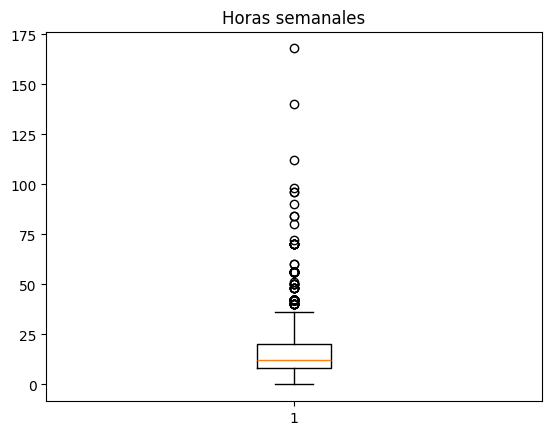

In [83]:
# Promedio de 
plt.boxplot(sc2DFImputed['HoursPerWeek'])
plt.title('Horas semanales')
plt.show()


In [ ]:
plt.boxplot(sc2DFImputed['Age'])
plt.title('Edad de participantes')
plt.show()

### 2.3. **Análisis y procesamiento**

#### 2.3.1. **Encoding**

Tal como se indicó anteriormente, debido a que nuestro dataset no contempla variables categóricas sino solo numéricas, no será necesario someter a nuestro dataset a un proceso de encoding.

#### 2.3.2. **Escalamiento**